In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
from keras.datasets import fashion_mnist

In [3]:
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
print(x_train_full.shape,y_train_full.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
#x_test[5]

In [6]:
x_val=x_train_full[:5000]/255
x_train=x_train_full[5000:]/255
y_val=y_train_full[:5000]
y_train=y_train_full[5000:]
x_test=x_test/255

In [7]:
model=keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]),
                              keras.layers.Dense(300,activation="elu"),
                              keras.layers.Dense(100,activation="elu"),
                              keras.layers.Dense(10,activation="softmax")])

model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


In [8]:
print(x_train.shape,y_train.shape)

(55000, 28, 28) (55000,)


In [9]:
print(x_val.shape,y_val.shape)

(5000, 28, 28) (5000,)


In [10]:
#model.fit(x_train,y_train,epochs=20,validation_data=(x_val,y_val))

In [11]:
import pickle

In [12]:
#pickle.dump(model,open('ANN_MNIST_vanila.sav',"wb"))

In [13]:
# model1: vanila deep ANN MNIST model
model1=pickle.load(open('ANN_MNIST_vanila.sav', 'rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-06-01 13:24:26         1980
metadata.json                                  2023-06-01 13:24:26           64
variables.h5                                   2023-06-01 13:24:28      3223088
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\flatten
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars


In [14]:
# Evaluate ANN MNIST vanila model
y_test_pred_prob=model1.predict(x_test)
y_test_pred_prob

313/313 [==============================] - 2s 3ms/step


array([[2.28995018e-15, 1.35884151e-10, 5.92796821e-14, ...,
        1.39819679e-03, 1.22034609e-17, 9.98601735e-01],
       [7.54221645e-08, 5.21206742e-16, 9.99606192e-01, ...,
        3.02800444e-18, 5.08428456e-16, 8.48830563e-16],
       [4.31813772e-33, 1.00000000e+00, 4.02715018e-37, ...,
        0.00000000e+00, 1.34033060e-28, 2.23651910e-29],
       ...,
       [1.01298821e-16, 1.60270065e-17, 1.39963665e-14, ...,
        2.51331870e-15, 1.00000000e+00, 1.63920288e-21],
       [3.85244641e-24, 1.00000000e+00, 7.82732087e-24, ...,
        1.96595093e-22, 2.41320803e-18, 8.47744540e-15],
       [4.79734321e-14, 4.81083137e-14, 3.15872068e-12, ...,
        9.74066339e-09, 8.20372741e-13, 2.49235501e-13]], dtype=float32)

In [15]:
print(x_test.shape)
print(y_test_pred_prob.shape)

(10000, 28, 28)
(10000, 10)


In [16]:
y_test_pred=np.argmax(y_test_pred_prob,axis=1)
print(y_test_pred.shape)
y_test_pred

(10000,)


array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [17]:
# evaluate model on test set
model1.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.4026 - accuracy: 0.8906


[0.4025881290435791, 0.8906000256538391]

In [18]:
model1.evaluate(x_train,y_train)

1719/1719 [==============================] - 7s 4ms/step - loss: 0.1353 - accuracy: 0.9477


[0.13529574871063232, 0.9476545453071594]

In [19]:
# check accuracy manually on test set
# def check_sim(a,b):
#     if a==b:
#         return 1
#     else:
#         return 0
# eval_test=pd.DataFrame({'y_test_pred':pd.Series(y_test_pred),'y_test':pd.Series(y_test)})
# eval_test['sim']=eval_test.apply(lambda x:check_sim(*x),axis=1)
# accuracy=eval_test['sim'].sum()*100/len(eval_test.index)
# print(accuracy)
# eval_test

#### Apply Deep ANN techniques to the dataset

#### 1. Initialisation methods

In [20]:
he_avg_init=keras.initializers.VarianceScaling(scale=2,mode="fan_avg",distribution="uniform")

model1=keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]),
                              keras.layers.Dense(300,activation="relu",kernel_initializer="he_normal"),
                              keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
                              keras.layers.Dense(10,activation="softmax",kernel_initializer=he_avg_init)])

model1.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [21]:
history1=model1.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=5)

Epoch 1/5
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4859 - accuracy: 0.8265 - val_loss: 0.3693 - val_accuracy: 0.8714
Epoch 2/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3671 - accuracy: 0.8642 - val_loss: 0.3295 - val_accuracy: 0.8774
Epoch 3/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3300 - accuracy: 0.8785 - val_loss: 0.3709 - val_accuracy: 0.8660
Epoch 4/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3078 - accuracy: 0.8853 - val_loss: 0.3221 - val_accuracy: 0.8834
Epoch 5/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2883 - accuracy: 0.8919 - val_loss: 0.3138 - val_accuracy: 0.8866


In [22]:
history1.history

{'loss': [0.48585960268974304,
  0.36714693903923035,
  0.3300038278102875,
  0.30782073736190796,
  0.2883121371269226],
 'accuracy': [0.8265454769134521,
  0.8642363548278809,
  0.8785454630851746,
  0.8852909207344055,
  0.8919273018836975],
 'val_loss': [0.3693040609359741,
  0.32946792244911194,
  0.37085065245628357,
  0.32209542393684387,
  0.31381866335868835],
 'val_accuracy': [0.871399998664856,
  0.8773999810218811,
  0.8659999966621399,
  0.883400022983551,
  0.8866000175476074]}

<Figure size 576x432 with 0 Axes>

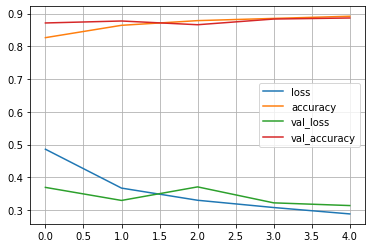

In [23]:
plt.figure(figsize=(8,6))
pd.DataFrame(history1.history).plot()
plt.grid(True)
plt.show()

In [24]:
model1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3489 - accuracy: 0.8756


[0.34890374541282654, 0.8755999803543091]

#### 2. Batch Normalisation

In [25]:
he_avg_init=keras.initializers.VarianceScaling(scale=2,mode="fan_avg",distribution="uniform")

model2=keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]),
                                keras.layers.BatchNormalization(),
                              keras.layers.Dense(300,activation="relu",kernel_initializer="he_normal"),
                                keras.layers.BatchNormalization(),
                              keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
                                keras.layers.BatchNormalization(),
                              keras.layers.Dense(10,activation="softmax",kernel_initializer=he_avg_init)])

model2.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [26]:
history2=model2.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=5)

Epoch 1/5
1719/1719 [==============================] - 19s 9ms/step - loss: 0.4793 - accuracy: 0.8284 - val_loss: 0.3517 - val_accuracy: 0.8702
Epoch 2/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3662 - accuracy: 0.8667 - val_loss: 0.3442 - val_accuracy: 0.8734
Epoch 3/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3319 - accuracy: 0.8760 - val_loss: 0.3169 - val_accuracy: 0.8826
Epoch 4/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3055 - accuracy: 0.8862 - val_loss: 0.3281 - val_accuracy: 0.8772
Epoch 5/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2831 - accuracy: 0.8942 - val_loss: 0.3118 - val_accuracy: 0.8868


In [27]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3368 - accuracy: 0.8820


[0.33681774139404297, 0.8820000290870667]

#### 3. Gradient Clipping

In [28]:
he_avg_init=keras.initializers.VarianceScaling(scale=2,mode="fan_avg",distribution="uniform")

model3=keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]),
                                keras.layers.BatchNormalization(),
                              keras.layers.Dense(300,activation="relu",kernel_initializer="he_normal"),
                                keras.layers.BatchNormalization(),
                              keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
                                keras.layers.BatchNormalization(),
                              keras.layers.Dense(10,activation="softmax",kernel_initializer=he_avg_init)])

optimizer=keras.optimizers.SGD(clipvalue=1.0)
#optimizer=keras.optimizers.SGD(clipnorm=1.0)
model3.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])

In [29]:
history3=model3.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=5)

Epoch 1/5
1719/1719 [==============================] - 16s 8ms/step - loss: 0.5533 - accuracy: 0.8080 - val_loss: 0.3977 - val_accuracy: 0.8622
Epoch 2/5
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4023 - accuracy: 0.8568 - val_loss: 0.3588 - val_accuracy: 0.8710
Epoch 3/5
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3611 - accuracy: 0.8703 - val_loss: 0.3538 - val_accuracy: 0.8742
Epoch 4/5
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3328 - accuracy: 0.8792 - val_loss: 0.3285 - val_accuracy: 0.8850
Epoch 5/5
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3154 - accuracy: 0.8847 - val_loss: 0.3208 - val_accuracy: 0.8854


In [30]:
model3.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3503 - accuracy: 0.8736


[0.35032105445861816, 0.8736000061035156]

#### 4. Transfer Learning

In [31]:
# model4=pickle.load(open('ANN_MNIST_RndSearch_2CV.sav',"rb"))
# model4.summary()

In [32]:
model1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3489 - accuracy: 0.8756


[0.34890374541282654, 0.8755999803543091]

In [33]:
# clone model2 to model_A 
# model_A=keras.models.clone_model(model1)
# model_A.set_weights(model1.get_weights())

In [34]:
# model_B_on_A=keras.models.Sequential(model_A.layers[:-1])
# model_B_on_A.add(keras.layers.Dense(10,activation="softmax"))

In [35]:
# MNIST Dataset
(x_train_full_A, y_train_full_A), (x_test_A, y_test_A) = keras.datasets.mnist.load_data()

In [36]:
# (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# print(x_train.shape,y_train.shape)
# print(x_test.shape,y_test.shape)
# print(len(np.unique(y_train)))
# print(np.unique(y_train))

# cat_class_map={0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

# plt.imshow(x_train[1])
# print(y_train[1])
# plt.show()

In [37]:
print(x_train_full_A.shape,y_train_full_A.shape)
print(x_test_A.shape,y_test_A.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


10


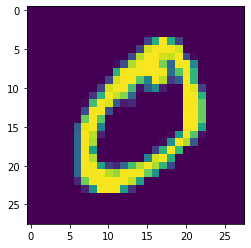

In [38]:
print(len(np.unique(y_train_full_A)))

plt.imshow(x_train_full_A[1])
# print(x_train_full_A[1])
plt.show()

In [39]:
# x_train_full_A[0]

In [40]:
x_val_A=x_train_full_A[:5000]/255
x_train_A=x_train_full_A[5000:]/255
y_val_A=y_train_full_A[:5000]
y_train_A=y_train_full_A[5000:]
x_test_A=x_test_A/255

In [41]:
model_A=keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]),
                                keras.layers.Dense(300,activation="elu"),
                                keras.layers.Dense(100,activation="elu"),
                                keras.layers.Dense(10,activation="softmax")])

model_A.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [42]:
history_A=model_A.fit(x_train_A,y_train_A,validation_data=(x_val_A,y_val_A),epochs=20)

Epoch 1/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.2427 - accuracy: 0.9267 - val_loss: 0.1393 - val_accuracy: 0.9582
Epoch 2/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1114 - accuracy: 0.9656 - val_loss: 0.0853 - val_accuracy: 0.9750
Epoch 3/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0789 - accuracy: 0.9749 - val_loss: 0.0834 - val_accuracy: 0.9742
Epoch 4/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0571 - accuracy: 0.9808 - val_loss: 0.0884 - val_accuracy: 0.9758
Epoch 5/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0451 - accuracy: 0.9852 - val_loss: 0.0774 - val_accuracy: 0.9792
Epoch 6/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0380 - accuracy: 0.9874 - val_loss: 0.0814 - val_accuracy: 0.9804
Epoch 7/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0317 - accuracy: 0.9893 - val_loss: 0.0813 - val_ac

In [43]:
model_A.evaluate(x_test_A,y_test_A)

313/313 [==============================] - 1s 4ms/step - loss: 0.1271 - accuracy: 0.9809


[0.12712667882442474, 0.98089998960495]

In [44]:
clone_model_A=keras.models.clone_model(model_A)
clone_model_A.set_weights(model_A.get_weights())

In [45]:
# model_B_on_A=keras.models.Sequential(keras.layers.Flatten(input_shape=[32,32]))
# model_B_on_A.add(model_A.layers[1:-1])
model_B_on_A=keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(10,activation="softmax"))

In [46]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable=False

In [47]:
model_B_on_A.compile(loss="sparse_categorical_crossentropy",metrics=["accuracy"],optimizer="adam")
historyB_on_A=model_B_on_A.fit(x_train,y_train,epochs=5,validation_data=(x_val,y_val))

Epoch 1/5
1719/1719 [==============================] - 11s 5ms/step - loss: 1.1104 - accuracy: 0.6646 - val_loss: 0.7068 - val_accuracy: 0.7520
Epoch 2/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6758 - accuracy: 0.7540 - val_loss: 0.6409 - val_accuracy: 0.7674
Epoch 3/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6281 - accuracy: 0.7718 - val_loss: 0.6139 - val_accuracy: 0.7858
Epoch 4/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6084 - accuracy: 0.7792 - val_loss: 0.5864 - val_accuracy: 0.8038
Epoch 5/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5972 - accuracy: 0.7819 - val_loss: 0.5913 - val_accuracy: 0.8010


In [48]:
model_B_on_A.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6329 - accuracy: 0.7770


[0.6328879594802856, 0.7770000100135803]

In [49]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable=True

In [50]:
optimizer=keras.optimizers.Adam(learning_rate=1e-4)

In [51]:
model_B_on_A.compile(loss="sparse_categorical_crossentropy",metrics=["accuracy"],optimizer=optimizer)
historyB_on_A2=model_B_on_A.fit(x_train,y_train,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5055 - accuracy: 0.8187 - val_loss: 0.4748 - val_accuracy: 0.8384
Epoch 2/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4341 - accuracy: 0.8455 - val_loss: 0.4208 - val_accuracy: 0.8562
Epoch 3/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3962 - accuracy: 0.8582 - val_loss: 0.4027 - val_accuracy: 0.8604
Epoch 4/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3713 - accuracy: 0.8656 - val_loss: 0.3867 - val_accuracy: 0.8658
Epoch 5/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3503 - accuracy: 0.8749 - val_loss: 0.3752 - val_accuracy: 0.8678
Epoch 6/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3342 - accuracy: 0.8787 - val_loss: 0.3693 - val_accuracy: 0.8708
Epoch 7/20
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3206 - accuracy: 0.8833 - val_loss: 0.3552 - val_ac

#### 5. Optimizers

In [52]:
# 5.0 SGD optimizer we already saw
# 5.1 Momentum Optimization
optimizer=keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)
model_A.compile(loss="sparse_categorical_crossentropy",metrics=["accuracy"],optimizer=optimizer)
history_A2=model_A.fit(x_train_A,y_train_A,epochs=5,validation_data=(x_val_A,y_val_A))


Epoch 1/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0104 - accuracy: 0.9971 - val_loss: 0.1339 - val_accuracy: 0.9816
Epoch 2/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.1268 - val_accuracy: 0.9828
Epoch 3/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.1256 - val_accuracy: 0.9828
Epoch 4/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.1237 - val_accuracy: 0.9834
Epoch 5/5
1719/1719 [==============================] - 283s 165ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.1232 - val_accuracy: 0.9836


In [53]:
# 5.2 NAG Optimizer
optimizer=keras.optimizers.SGD(learning_rate=0.001,momentum=0.9,nesterov=True)
model_A.compile(loss="sparse_categorical_crossentropy",metrics=["accuracy"],optimizer=optimizer)
history_A3=model_A.fit(x_train_A,y_train_A,epochs=5,validation_data=(x_val_A,y_val_A))


Epoch 1/5
1719/1719 [==============================] - 13s 7ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.1227 - val_accuracy: 0.9832
Epoch 2/5
1719/1719 [==============================] - 10s 6ms/step - loss: 8.5818e-04 - accuracy: 0.9999 - val_loss: 0.1222 - val_accuracy: 0.9834
Epoch 3/5
1719/1719 [==============================] - 12s 7ms/step - loss: 7.3074e-04 - accuracy: 0.9999 - val_loss: 0.1218 - val_accuracy: 0.9838
Epoch 4/5
1719/1719 [==============================] - 12s 7ms/step - loss: 6.3971e-04 - accuracy: 0.9999 - val_loss: 0.1214 - val_accuracy: 0.9844
Epoch 5/5
1719/1719 [==============================] - 12s 7ms/step - loss: 5.7833e-04 - accuracy: 1.0000 - val_loss: 0.1214 - val_accuracy: 0.9850


In [54]:
# 5.3 Adagrad Optimizer
optimizer=keras.optimizers.Adagrad(learning_rate=0.001,epsilon=1e-07)
model_A.compile(loss="sparse_categorical_crossentropy",metrics=["accuracy"],optimizer=optimizer)
history_A4=model_A.fit(x_train_A,y_train_A,epochs=5,validation_data=(x_val_A,y_val_A))

Epoch 1/5
1719/1719 [==============================] - 15s 8ms/step - loss: 5.1224e-04 - accuracy: 1.0000 - val_loss: 0.1213 - val_accuracy: 0.9850
Epoch 2/5
1719/1719 [==============================] - 12s 7ms/step - loss: 4.9896e-04 - accuracy: 1.0000 - val_loss: 0.1212 - val_accuracy: 0.9850
Epoch 3/5
1719/1719 [==============================] - 12s 7ms/step - loss: 4.8705e-04 - accuracy: 1.0000 - val_loss: 0.1212 - val_accuracy: 0.9850
Epoch 4/5
1719/1719 [==============================] - 12s 7ms/step - loss: 4.7619e-04 - accuracy: 1.0000 - val_loss: 0.1211 - val_accuracy: 0.9852
Epoch 5/5
1719/1719 [==============================] - 12s 7ms/step - loss: 4.6612e-04 - accuracy: 1.0000 - val_loss: 0.1210 - val_accuracy: 0.9852


In [55]:
# 5.4 RMS Prop Optimizer
optimizer=keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9)
model_A.compile(loss="sparse_categorical_crossentropy",metrics=["accuracy"],optimizer=optimizer)
history_A5=model_A.fit(x_train_A,y_train_A,epochs=5,validation_data=(x_val_A,y_val_A))

Epoch 1/5
1719/1719 [==============================] - 16s 8ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.1113 - val_accuracy: 0.9862
Epoch 2/5
1719/1719 [==============================] - 12s 7ms/step - loss: 5.0054e-04 - accuracy: 0.9998 - val_loss: 0.1201 - val_accuracy: 0.9850
Epoch 3/5
1719/1719 [==============================] - 12s 7ms/step - loss: 4.6613e-05 - accuracy: 1.0000 - val_loss: 0.1101 - val_accuracy: 0.9864
Epoch 4/5
1719/1719 [==============================] - 11s 6ms/step - loss: 2.2229e-05 - accuracy: 1.0000 - val_loss: 0.1171 - val_accuracy: 0.9860
Epoch 5/5
1719/1719 [==============================] - 12s 7ms/step - loss: 1.0489e-05 - accuracy: 1.0000 - val_loss: 0.1166 - val_accuracy: 0.9868


In [56]:
# 5.5 Adam Optimizer
optimizer=keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model_A.compile(loss="sparse_categorical_crossentropy",metrics=["accuracy"],optimizer=optimizer)
history_A6=model_A.fit(x_train_A,y_train_A,epochs=5,validation_data=(x_val_A,y_val_A))

Epoch 1/5
1719/1719 [==============================] - 15s 7ms/step - loss: 0.0156 - accuracy: 0.9961 - val_loss: 0.1469 - val_accuracy: 0.9776
Epoch 2/5
1719/1719 [==============================] - 11s 7ms/step - loss: 0.0139 - accuracy: 0.9961 - val_loss: 0.1505 - val_accuracy: 0.9806
Epoch 3/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0116 - accuracy: 0.9966 - val_loss: 0.1584 - val_accuracy: 0.9814
Epoch 4/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.2192 - val_accuracy: 0.9768
Epoch 5/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0137 - accuracy: 0.9963 - val_loss: 0.1594 - val_accuracy: 0.9814


#### 6. Learning Rate Scheduler

In [112]:
0.1**(0.1)  #0.1=1/10

0.7943282347242815

In [113]:
0.1**(0.2)   # 0.2=1/5

0.6309573444801932

In [110]:
# 6.1 Exponential Learning Rate Decay
# s:The decay is the inverse of s (the num‐ber of steps it takes to divide the learning rate by one more unit)
def exponential_decay(e,l):
    print("e l = ",e,l)
    if e==0:
        return 0.0
    return (l**(20/e))

exponential_decay_fn = exponential_decay
print(exponential_decay_fn)
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
print(lr_scheduler)
history_A7=model_A.fit(x_train_A,y_train_A,validation_data=(x_val_A,y_val_A),callbacks=[lr_scheduler], epochs=15)

<function exponential_decay at 0x0000020DEC2BBB80>


TypeError: fit() got an unexpected keyword argument 'learning_rate'

In [70]:
# 6.2 Piecewise constant function
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001


In [74]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)
print(lr_scheduler)
history_A8=model_A.fit(x_train_A,y_train_A,validation_data=(x_val_A,y_val_A),epochs=10,callbacks=[lr_scheduler])

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1821 - accuracy: 0.9715 - val_loss: 0.2554 - val_accuracy: 0.9640 - lr: 0.0100
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1812 - accuracy: 0.9737 - val_loss: 0.2672 - val_accuracy: 0.9646 - lr: 0.0100
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1802 - accuracy: 0.9748 - val_loss: 0.2761 - val_accuracy: 0.9658 - lr: 0.0100
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1711 - accuracy: 0.9765 - val_loss: 0.3778 - val_accuracy: 0.9654 - lr: 0.0100
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1764 - accuracy: 0.9770 - val_loss: 0.3174 - val_accuracy: 0.9710 - lr: 0.0100
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0734 - accuracy: 0.9879 - val_loss: 0.1945 - val_accuracy: 0.9758 - lr: 0.0050
Epoch 7/10
1719/1719 [==============================] - 9s

In [ ]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

In [ ]:
# 6.3 

In [69]:
import math
0.01 * math.exp(-0.1)

0.009048374180359595

#### 7. Regularizer

##### 7.a l1 and l2 regularizer

In [75]:
layer = keras.layers.Dense(100, activation="elu",
 kernel_initializer="he_normal",
 kernel_regularizer=keras.regularizers.l2(0.01))


In [76]:
# To vaoid writing function definition again and again
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
 activation="elu",
 kernel_initializer="he_normal",
 kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 RegularizedDense(300),
 RegularizedDense(100),
 RegularizedDense(10, activation="softmax",
 kernel_initializer="glorot_uniform")
])


##### 7.b Dropout

In [77]:
model_A_drop = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dropout(rate=0.2),
 keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
 keras.layers.Dropout(rate=0.2),
 keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
 keras.layers.Dropout(rate=0.2),
 keras.layers.Dense(10, activation="softmax")
])

In [82]:
optimizer=keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)

In [83]:
model_A_drop.compile(loss="sparse_categorical_crossentropy",metrics=["accuracy"],optimizer=optimizer)
history_A_drop=model_A_drop.fit(x_train_A,y_train_A,epochs=5,validation_data=(x_val_A,y_val_A))

Epoch 1/5
1719/1719 [==============================] - 12s 6ms/step - loss: 0.2348 - accuracy: 0.9273 - val_loss: 0.1206 - val_accuracy: 0.9642
Epoch 2/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1701 - accuracy: 0.9466 - val_loss: 0.0975 - val_accuracy: 0.9710
Epoch 3/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1401 - accuracy: 0.9557 - val_loss: 0.0820 - val_accuracy: 0.9770
Epoch 4/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1250 - accuracy: 0.9603 - val_loss: 0.0769 - val_accuracy: 0.9806
Epoch 5/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1105 - accuracy: 0.9649 - val_loss: 0.0804 - val_accuracy: 0.9780


In [ ]:
# Dropout is carried on train set rather than test set.
# Dropout layer is active on train set and inactive on test set

##### 7.c Monte -Carle Dropout

In [84]:
y_probas=np.stack([model_A(x_test_A,training=True) for sample in range(100)])
y_proba=y_probas.mean(axis=0)

In [86]:
np.round(model_A.predict(x_test_A[:1],2))

1/1 [==============================] - 0s 139ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [87]:
np.round(y_probas[:,:1],2)

array([[[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0.,

In [88]:
np.round(y_proba[:1],2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [90]:
y_std=y_probas.std(axis=0)
np.round(y_std[:1],2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

##### 7.d Max-Norm regularization

In [92]:
# To constrain weight to help alleviate the unstable gradient problem(if not using Batch Normalisation)
keras.layers.Dense(100,activation="elu",kernel_initializer="he_normal",kernel_constraint=keras.constraints.max_norm(1))